In [1]:
import pandas as pd

## Load excel files into DataFrames

In [2]:
# Load the Excel files
workshop_df = pd.read_excel("data/workshop-humidity.xlsx", parse_dates=["last_changed"])
outdoor_df = pd.read_excel("data/outdoor-humidity.xlsx", parse_dates=["last_changed"])

## Check the contents of each file

In [27]:
workshop_df[:5]

,workshop_humidity,last_changed
0,72,2025-06-09 08:00:00+00:00
1,72.301233,2025-06-09 09:00:00+00:00
2,73.458445,2025-06-09 10:00:00+00:00
3,73.286227,2025-06-09 11:00:00+00:00
4,71.891774,2025-06-09 12:00:00+00:00


In [28]:
outdoor_df[:5]

,outdoor_humidity,last_changed
0,71.1,2025-05-28 08:00:00+00:00
1,70.155275,2025-05-28 09:00:00+00:00
2,69.141075,2025-05-28 10:00:00+00:00
3,71.994078,2025-05-28 11:00:00+00:00
4,72.944769,2025-05-28 12:00:00+00:00


## Cleanup the columns for readability

In [32]:
# Drop 'entity_id' columns if present
workshop_df = workshop_df.drop(columns=["entity_id"], errors="ignore")
outdoor_df = outdoor_df.drop(columns=["entity_id"], errors="ignore")

# Rename value columns
workshop_df = workshop_df.rename(columns={"state": "workshop_humidity"})
outdoor_df = outdoor_df.rename(columns={"state": "outdoor_humidity"})

In [31]:
workshop_df[:5]

,workshop_humidity,last_changed
0,72,2025-06-09 08:00:00+00:00
1,72.301233,2025-06-09 09:00:00+00:00
2,73.458445,2025-06-09 10:00:00+00:00
3,73.286227,2025-06-09 11:00:00+00:00
4,71.891774,2025-06-09 12:00:00+00:00


## Merged the two tables into one

In [7]:
# Merge on 'last_changed', keeping only matching timestamps
merged_df = pd.merge(workshop_df, outdoor_df, on="last_changed", how="inner", sort=True)

# Drop NaNs and sort by timestamp
merged_df = merged_df.dropna().sort_values("last_changed").reset_index(drop=True)
merged_df

,workshop_humidity,last_changed,outdoor_humidity
0,72,2025-06-09 08:00:00+00:00,80.155981
1,72.301233,2025-06-09 09:00:00+00:00,81.061118
2,73.458445,2025-06-09 10:00:00+00:00,80.358306
3,73.286227,2025-06-09 11:00:00+00:00,79.415556
4,71.891774,2025-06-09 12:00:00+00:00,80.436706
...,...,...,...
1051,71.80301,2025-07-23 18:00:00+00:00,83.074478
1052,71.710041,2025-07-23 19:00:00+00:00,83.334243
1053,71.702008,2025-07-23 20:00:00+00:00,83.997042
1054,76,2025-07-24 00:11:32.947000+00:00,86.727699


## Plot humidity over time

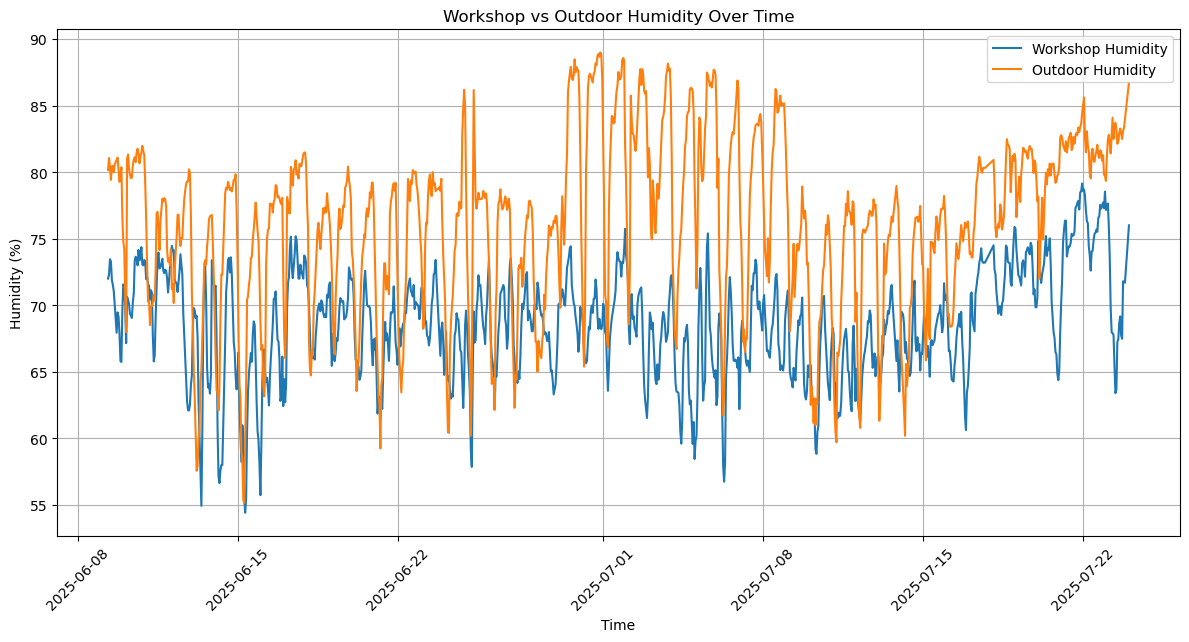

In [10]:
import matplotlib.pyplot as plt

# (Assuming merged_df already exists from previous steps)
plt.savefig("humidity_delta_plot.png", dpi=300)
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(merged_df['last_changed'], merged_df['workshop_humidity'], label='Workshop Humidity')
plt.plot(merged_df['last_changed'], merged_df['outdoor_humidity'], label='Outdoor Humidity')

# Add labels, legend, and formatting
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.title('Workshop vs Outdoor Humidity Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

# Get the difference between outdoor and workshop humidity

In [13]:
# Calculate difference between outdoor and workshop humidity
merged_df['humidity_delta'] = merged_df['outdoor_humidity'] - merged_df['workshop_humidity']
merged_df[:5]

,workshop_humidity,last_changed,outdoor_humidity,humidity_delta
0,72,2025-06-09 08:00:00+00:00,80.155981,8.155981
1,72.301233,2025-06-09 09:00:00+00:00,81.061118,8.759885
2,73.458445,2025-06-09 10:00:00+00:00,80.358306,6.899861
3,73.286227,2025-06-09 11:00:00+00:00,79.415556,6.12933
4,71.891774,2025-06-09 12:00:00+00:00,80.436706,8.544932


## Plot the difference over time

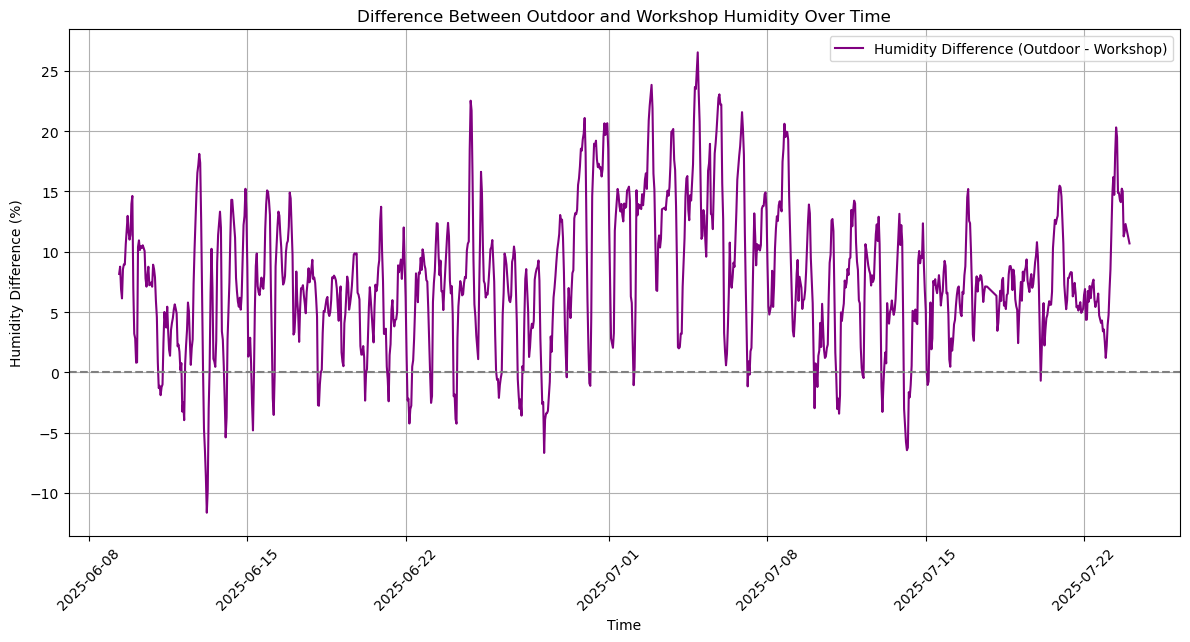

In [14]:
# Plot the difference over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['last_changed'], merged_df['humidity_delta'], label='Humidity Difference (Outdoor - Workshop)', color='purple')

# Add labels and formatting
plt.xlabel('Time')
plt.ylabel('Humidity Difference (%)')
plt.title('Difference Between Outdoor and Workshop Humidity Over Time')
plt.axhline(0, color='gray', linestyle='--')  # Reference line at zero
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

## Clean-up plot for readability

Include only data from July 15, add marking for when I got the dehumidifier

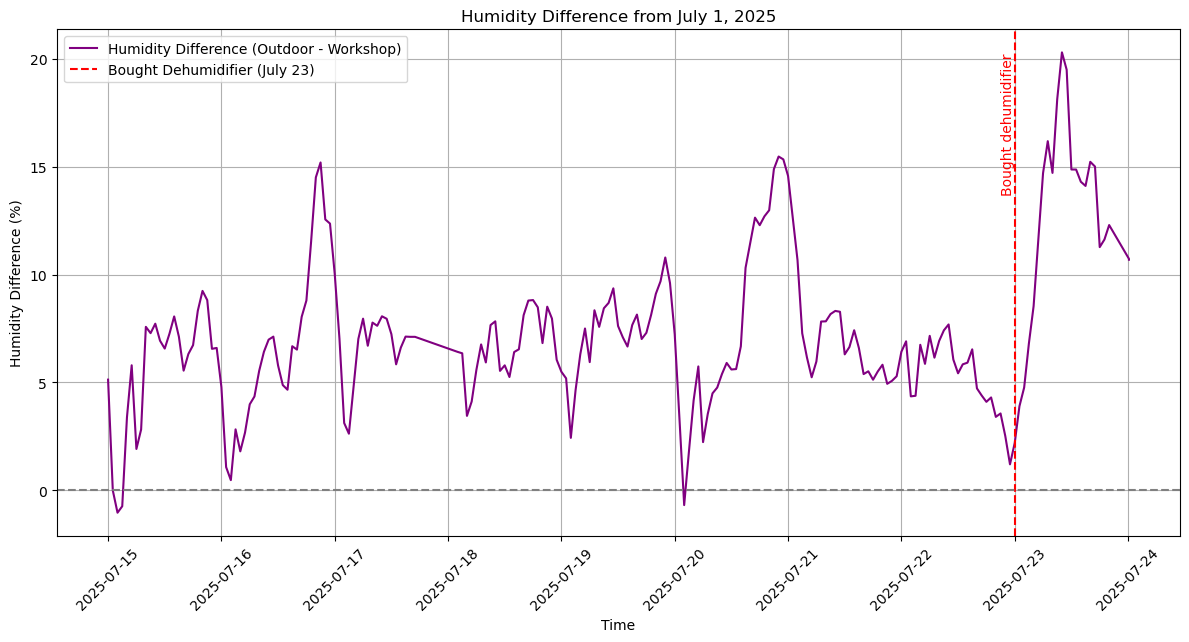

In [26]:
import pytz

# Assume merged_df is already loaded and processed

# Set timezone-aware start date (UTC)
start_date = pd.to_datetime("2025-07-15").tz_localize("UTC")
dehumidifier_date = pd.to_datetime("2025-07-23").tz_localize("UTC")

# Filter from July 1 onwards
filtered_df = merged_df[merged_df['last_changed'] >= start_date].copy()

# Compute humidity difference
filtered_df['humidity_delta'] = filtered_df['outdoor_humidity'] - filtered_df['workshop_humidity']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['last_changed'], filtered_df['humidity_delta'], label='Humidity Difference (Outdoor - Workshop)', color='purple')

# Dehumidifier marker
plt.axvline(dehumidifier_date, color='red', linestyle='--', linewidth=1.5, label='Bought Dehumidifier (July 23)')
plt.text(dehumidifier_date, plt.ylim()[1]*0.95, 'Bought dehumidifier', color='red', rotation=90, va='top', ha='right')

# Final formatting
plt.xlabel('Time')
plt.ylabel('Humidity Difference (%)')
plt.title('Humidity Difference from July 1, 2025')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

plt.savefig("humidity_delta_plot.png", dpi=300)
plt.show()